In [1]:
import pandas as pd 
import numpy as np

In [60]:
import matplotlib as plt
import seaborn as sns
import sklearn

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [74]:
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv(r'D:\Quoc Thang\DATA ANALYST PROJECT\MACHINE LEARNING\PROJECT 1\telecom_churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

<Axes: >

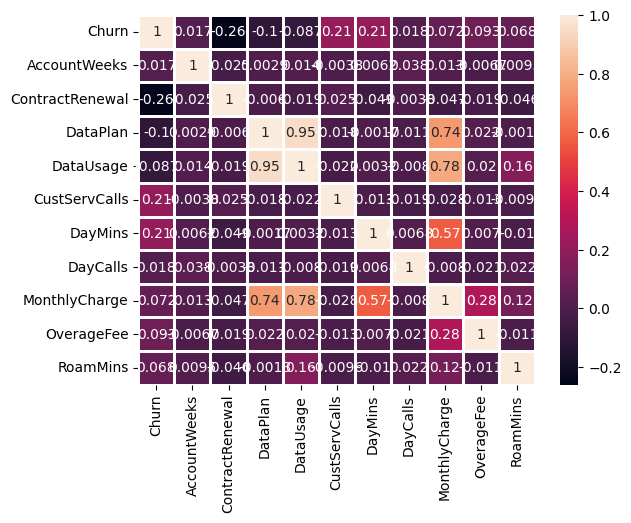

In [14]:
sns.heatmap(df.corr(),annot=True,linewidths=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14156\1201784842.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


<Axes: xlabel='Churn', ylabel='count'>

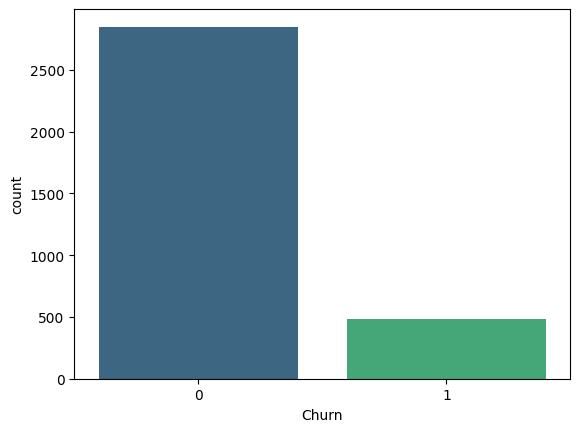

In [15]:
sns.countplot(x='Churn', data=df, palette='viridis')

<Axes: xlabel='DayMins', ylabel='Count'>

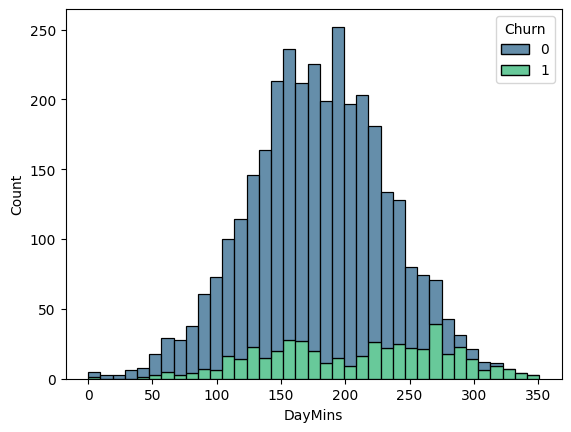

In [18]:
sns.histplot(data=df, x='DayMins', hue='Churn', multiple='stack', palette='viridis')

<Axes: xlabel='MonthlyCharge', ylabel='Count'>

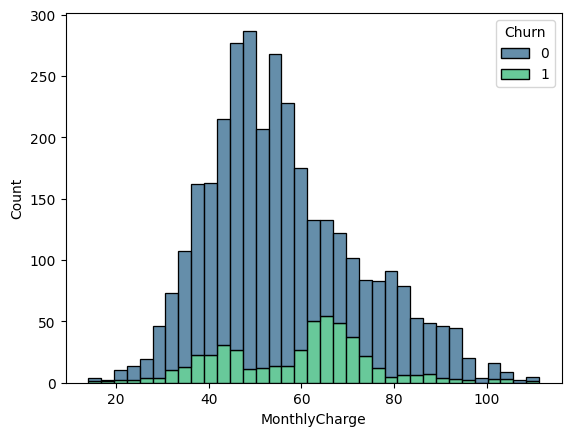

In [23]:
sns.histplot(data=df, x='MonthlyCharge', hue='Churn', multiple='stack', palette='viridis')

<Axes: xlabel='CustServCalls', ylabel='Count'>

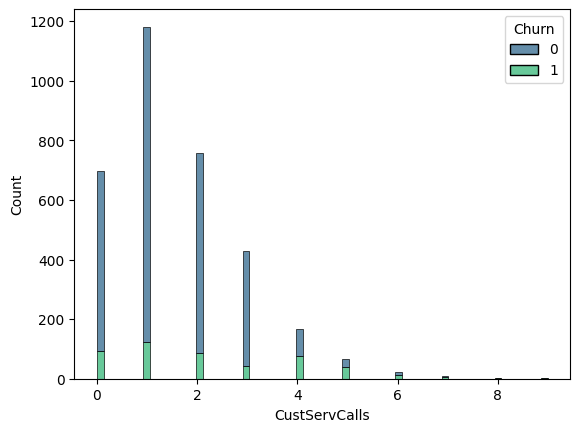

In [24]:
sns.histplot(data=df, x='CustServCalls', hue='Churn', multiple='stack', palette='viridis')


C:\Users\DELL\AppData\Local\Temp\ipykernel_14156\3168581743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14156\3168581743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14156\3168581743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=feature, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_14156\3168581743.p

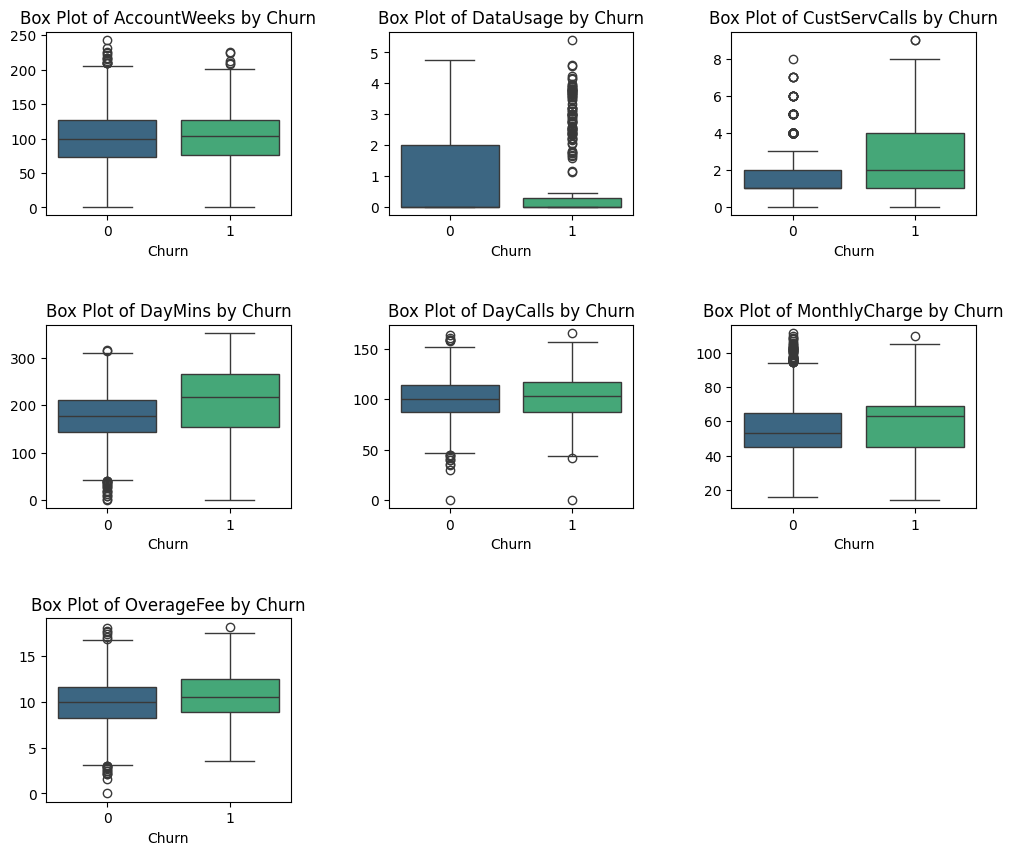

In [45]:
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee']
plt.figure(figsize=(12, 10))
for i , feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Churn', y=feature, palette='viridis')
    plt.title(f'Box Plot of {feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel('')

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

In [37]:
import matplotlib.pyplot as plt

In [30]:
numerical_features = ['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee']
print(enumerate(numerical_features))

In [47]:
df['AvgCallDuration'] = df['DayMins'] / df['DayCalls']


In [48]:
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'AvgCallDuration']
target = 'Churn'

# Separate the features (X) and the target variable (y)
X = df[features]
y = df[target]

In [65]:
imputer = SimpleImputer(strategy = 'mean')
X = imputer.fit_transform(X)

In [67]:
pd.DataFrame(X).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [69]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [1]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

NameError: name 'LogisticRegression' is not defined